# Table of Contents
 <p><div class="lev1 toc-item"><a href="#初等関数" data-toc-modified-id="初等関数-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>初等関数</a></div><div class="lev2 toc-item"><a href="#ラジアンと角度(lost)" data-toc-modified-id="ラジアンと角度(lost)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ラジアンと角度(lost)</a></div><div class="lev1 toc-item"><a href="#ユーザ定義関数" data-toc-modified-id="ユーザ定義関数-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ユーザ定義関数</a></div><div class="lev2 toc-item"><a href="#より厳密な定義" data-toc-modified-id="より厳密な定義-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>より厳密な定義</a></div>

# 初等関数

四則演算は”＋ー＊・”．分数は，

In [1]:
from sympy import *
print(3/4);

0.75


であるが，Rational(有理数)というコマンドを使うと

In [2]:
Rational(3/4)

3/4

 と，分数のまま表示してくれる．

sympyを使うと$x$を変数として，そのままの記号で使うことが可能となる．ちょっと変な記述だが，

In [3]:
x = symbols('a')
eq1 = 3*x**2 -4*x + 3
pprint(eq1)

   2          
3⋅a  - 4⋅a + 3


とすると変数名としてのxとそこに割り当てられた記号としての$a$の関係がわかるだろう．

その他の関数もそのまま直感的な名前が使える．

In [6]:
pprint(sqrt(2))

√2


In [7]:
pprint(log(x))

log(a)


In [8]:
pprint(sin(x)**2+cos(x)**2)

   2         2   
sin (a) + cos (a)


## ラジアンと角度(lost)

mpmathをいれないと駄目？　でも，mpmathの説明があまりまともにされてない．
数値計算だよね．

degreesとかradiansに関しては，sympyで用意されてないようだ．

In [9]:
from math import *
degrees(pi/3)

59.99999999999999

In [10]:
radians(60)

1.0471975511965976

In [11]:
cos(pi/3)

0.5000000000000001

In [12]:
from sympy import cos, pi

cos(pi/3)

1/2

In [13]:
pprint(pi)

π


In [14]:
print(Rational(1/3))


6004799503160661/18014398509481984


SympyではRational, Real, Integerが数としてあるらしい．

Pi/3などをrationalとしては扱えない．したがって，三角関数の変形ではミスることになるな．
んーーーん．ちとしんどいかも．

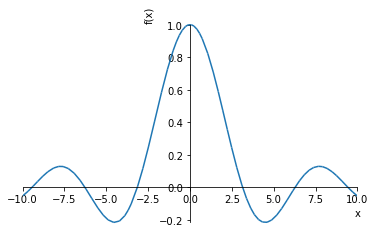

In [15]:
from sympy import Symbol
from sympy.plotting import plot
from sympy import sin, sinc

x=Symbol('x')
plot(sinc(x))

In [16]:
from sympy import acos, oo, pi
acos(oo)

oo*I

In [17]:
acos(0)

pi/2

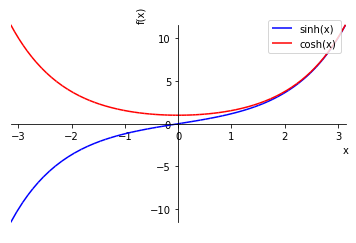

In [18]:
p1 = plot(sinh(x), cosh(x), (x,-pi,pi),
         legend=True, show=False)
p1[0].line_color = 'b'
p1[1].line_color = 'r'
p1.show()

# ユーザ定義関数
## 簡単な定義
単純にユーザが関数を定義するには下の通りすれば良い．その場合，入力はsubsを使う．

In [5]:
my_func = 2*x - 3

In [9]:
from sympy import *
a, x = symbols('a x')
pprint(my_func.subs({x:x}))
pprint(my_func.subs({x:a}))


2⋅x - 3
2⋅a - 3


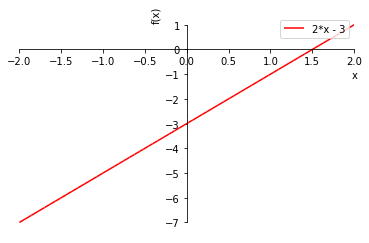

In [11]:
from sympy.plotting import plot
p1 = plot(my_func, (x,-2,2),
         legend=True, show=False)
p1[0].line_color = 'r'
p1.show()

## より厳密な定義

より厳密に関数を定義するにはFunctionで定義する必要がある．

In [13]:
f = Function('f')

In [17]:
pprint(Derivative(f(x),x))

d       
──(f(x))
dx      


In [18]:
?Function

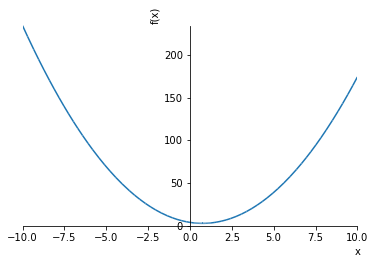

In [23]:
class my_func(Function):
    @classmethod
    def eval(cls, x):
        return 2*x**2-3*x+4

plot(my_func(x))

In [24]:
diff(my_func(x),x)

4*x - 3